In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df_main = pd.read_csv('Merged.csv',index_col=0)

In [3]:
df_main

,year_x,latitude,longitude,cbs_grid_code,date,green_score,livability_score_x,neighborhood_name,TotalHouses,Population,...,neighborhood,regions,year_y,livability_score_y,income,population,working_population,total_job_growth,Neighborhood,Average Green Score
0,2018,51.624016,4.739571,E1101N4041,9/1/2018,29.166667,2.054917,Overkroeten,83253,3210,...,Overkroeten,Breda noord-west,2001,80,2600,3330,2480,"-1,6%",Overkroeten,26.828276
1,2018,51.624016,4.739571,E1101N4041,9/1/2018,29.166667,2.054917,Overkroeten,83253,3210,...,Overkroeten,Breda noord-west,2003,90,2600,3330,2480,"-1,6%",Overkroeten,26.828276
2,2018,51.624016,4.739571,E1101N4041,9/1/2018,29.166667,2.054917,Overkroeten,83253,3210,...,Overkroeten,Breda noord-west,2002,80,2600,3330,2480,"-1,6%",Overkroeten,26.828276
3,2018,51.624016,4.739571,E1101N4041,9/1/2018,29.166667,2.054917,Overkroeten,83253,3210,...,Overkroeten,Breda noord-west,2012,190,2600,3330,2480,"-1,6%",Overkroeten,26.828276
4,2018,51.624016,4.739571,E1101N4041,9/1/2018,29.166667,2.054917,Overkroeten,83253,3210,...,Overkroeten,Breda noord-west,2015,200,2600,3330,2480,"-1,6%",Overkroeten,26.828276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513278,2016,51.549715,4.730011,E1094N3958,8/1/2016,52.333333,2.502522,Effen-Rith,81649,815,...,Effen-Rith,Breda west,2014,110,700,840,630,-9.00%,Effen-Rith,35.009524
513279,2016,51.549715,4.730011,E1094N3958,8/1/2016,52.333333,2.502522,Effen-Rith,81649,815,...,Effen-Rith,Breda west,2017,130,700,840,630,-9.00%,Effen-Rith,35.009524
513280,2016,51.549715,4.730011,E1094N3958,8/1/2016,52.333333,2.502522,Effen-Rith,81649,815,...,Effen-Rith,Breda west,2005,50,700,840,630,-9.00%,Effen-Rith,35.009524
513281,2016,51.549715,4.730011,E1094N3958,8/1/2016,52.333333,2.502522,Effen-Rith,81649,815,...,Effen-Rith,Breda west,2016,120,700,840,630,-9.00%,Effen-Rith,35.009524


In [4]:
df_main.columns

Index(['year_x', 'latitude', 'longitude', 'cbs_grid_code', 'date',
       'green_score', 'livability_score_x', 'neighborhood_name', 'TotalHouses',
       'Population', 'index', 'neighborhood', 'regions', 'year_y',
       'livability_score_y', 'income', 'population', 'working_population',
       'total_job_growth', 'Neighborhood', 'Average Green Score'],
      dtype='object')

In [5]:

df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513283 entries, 0 to 513282
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year_x               513283 non-null  int64  
 1   latitude             513283 non-null  float64
 2   longitude            513283 non-null  float64
 3   cbs_grid_code        513283 non-null  object 
 4   date                 513283 non-null  object 
 5   green_score          513283 non-null  float64
 6   livability_score_x   513283 non-null  float64
 7   neighborhood_name    513283 non-null  object 
 8   TotalHouses          513283 non-null  int64  
 9   Population           513283 non-null  int64  
 10  index                513283 non-null  int64  
 11  neighborhood         513283 non-null  object 
 12  regions              513283 non-null  object 
 13  year_y               513283 non-null  int64  
 14  livability_score_y   513283 non-null  int64  
 15  income           

In [6]:
len(df_main.index)

513283

In [7]:
df_main.dropna(inplace=True)

In [8]:
len(df_main.index)

295681

In [9]:
df_main.drop(columns=['neighborhood_name','Neighborhood','population'],inplace=True)

In [10]:
df_main.columns

Index(['year_x', 'latitude', 'longitude', 'cbs_grid_code', 'date',
       'green_score', 'livability_score_x', 'TotalHouses', 'Population',
       'index', 'neighborhood', 'regions', 'year_y', 'livability_score_y',
       'income', 'working_population', 'total_job_growth',
       'Average Green Score'],
      dtype='object')

In [22]:
df_neighborhood = df_main.drop(columns=['regions','cbs_grid_code','latitude','longitude'])
df_regions = df_main.drop(columns = ['neighborhood','cbs_grid_code','latitude','longitude'])
df_years = df_main.drop(columns = 'year_x')
df_livability = df_main.drop(columns = 'livability_score_x')

In [24]:
corr_neighborhoods = df_neighborhood.corr()
corr_regions = df_regions.corr()
corr_years = df_years.corr()
corr_livability = df_livability.corr()

In [92]:
def corr_heatmaps(data1, data2, method='pearson'):

    # Basic Configuration
    fig, axes = plt.subplots(ncols=2, figsize=(12, 12))
    ax1, ax2 = axes
    corr_matrix1 = data1.corr(method=method)
    corr_matrix2 = data2.corr(method=method)
    columns1 = corr_matrix1.columns
    columns2 = corr_matrix2.columns

    # Heat maps.
    im1 = ax1.matshow(corr_matrix1, cmap='coolwarm')
    im2 = ax2.matshow(corr_matrix2, cmap='coolwarm')

    # Formatting for heat map 1.
    ax1.set_xticks(range(len(columns1)))
    ax1.set_yticks(range(len(columns1)))
    ax1.set_xticklabels(columns1)
    ax1.set_yticklabels(columns1)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')
    plt.colorbar(im1, fraction=0.045, pad=0.05, ax=ax1)

    # Formatting for heat map 2.
    ax2.set_xticks(range(len(columns2)))
    ax2.set_yticks(range(len(columns2)))
    ax2.set_xticklabels(columns2)
    ax2.set_yticklabels(columns2)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')
    plt.colorbar(im2, fraction=0.045, pad=0.05, ax=ax2)

    fig.tight_layout()

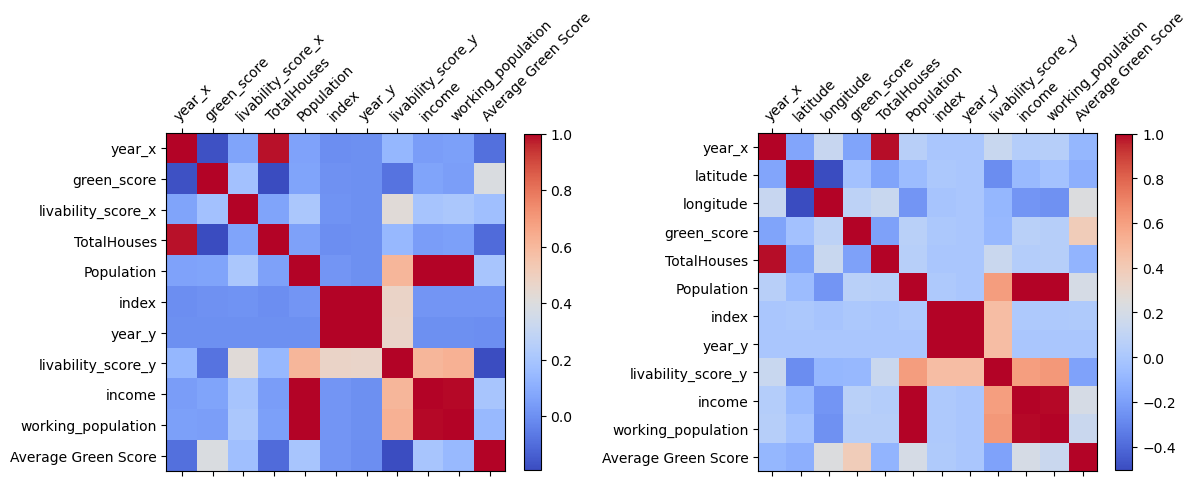

In [94]:
corr_heatmaps(df_neighborhood,df_livability)